In [1]:
%load_ext autoreload
%autoreload 2

<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [43]:
import pyAgrum as gum
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb

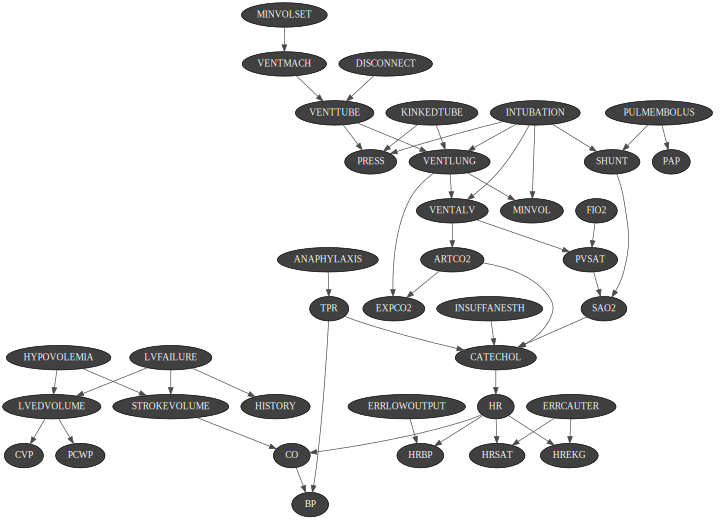

HR<LOW,NORMAL,HIGH>


In [44]:
bn=gum.loadBN("res/alarm.dsl")
gnb.showBN(bn,size="10")
print(bn.variable("HR"))

Let's say that you would like to use this Bayesian network to learn a classifier for the class HR (3 classes)

In [47]:
#generating the base of 10 values for testing purpose
print(f"LL(alarm-1O)={gum.generateCSV(bn,'out/alarm-10.csv',18,with_labels=True)}")

LL(alarm-1O)=-311.9908244755651


# From a Bayesian network to a Classifier

Binary classifier : False


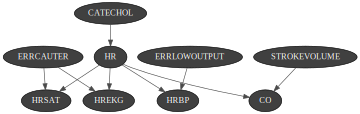

predicted : ['HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH']
in base   : ['HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH']


In [48]:
bnc=skbn.BNClassifier()
bnc.fromTrainedModel(bn,targetAttribute="HR")
print(f"Binary classifier : {bnc.isBinaryClassifier}")
gnb.showBN(bnc.MarkovBlanket)

xTrain, yTrain = bnc.XYfromCSV(filename ='out/alarm-10.csv' )
print(f"predicted : {list(bnc.predict(xTrain))}")
print(f"in base   : {yTrain.to_list()}")

In [49]:
print(list(bnc.predict(X ='out/alarm-10.csv')))

['HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH']


In [50]:
scoreCSV1 = bnc.score('out/alarm-10.csv', y = yTrain)
print("{0:.2f}% good predictions".format(100*scoreCSV1))

100.00% good predictions


# From a Bayesian network to a Binary classifier

By targetting a specific label, one can create a binary classifier to predict this very target.

Binary classifier : True


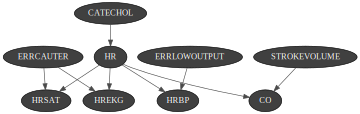

predicted : [False, True, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False]
in base   : [False, True, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False]


In [65]:
bnc=skbn.BNClassifier()
bnc.fromTrainedModel(bn,targetAttribute="HR",targetModality="NORMAL")
print(f"Binary classifier : {bnc.isBinaryClassifier}")
gnb.showBN(bnc.MarkovBlanket)

xTrain, yTrain = bnc.XYfromCSV(filename ='out/alarm-10.csv' )
print(f"predicted : {list(bnc.predict(xTrain))}")
print(f"in base   : {yTrain.to_list()}")

In [66]:
print(list(bnc.predict(X ='out/alarm-10.csv')))

[False, True, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False]


In [67]:
scoreCSV1 = bnc.score('out/alarm-10.csv', y = yTrain)
print("{0:.2f}% good predictions".format(100*scoreCSV1))

100.00% good predictions


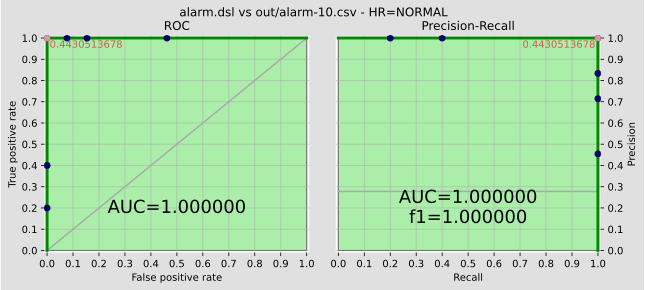

In [70]:
bnc.showROC_PR('out/alarm-10.csv')